In [1]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
plt.style.use("ggplot")

Mounted at /content/drive


In [2]:
!ls "/content/drive/My Drive"

 AU_Car_Models.csv    AU_Dealers.csv	     'Berat Hamanca - CV.pdf'
 AU_Car_Recalls.csv   AU_Sales_By_Model.csv  'Colab Notebooks'
 AU_Daily_Sales.csv   AU_Sentiment.csv	      PythonP


In [5]:
!ls "/content/drive/My Drive/PythonP/tr.csv"

'/content/drive/My Drive/PythonP/tr.csv'


In [7]:
df = pd.read_csv("/content/drive/My Drive/PythonP/tr.csv")

In [9]:
df.shape

(16, 13)

In [10]:
df.head()

,Year,Population,Yearly % Change,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban Pop %,Urban Population,Country's Share of World Pop,World Population,Turkey Global Rank
0,2023,"85,816,199",0.56%,"474,958","-318,067",31.8,1.86,112,77.10%,"66,156,581",1.07%,"8,045,311,447",18.0
1,2022,"85,341,241",0.67%,"565,837","-301,586",31.3,1.88,111,76.70%,"65,482,895",1.07%,"7,975,105,156",18.0
2,2020,"84,135,428",0.78%,"653,744","-80,952",30.6,1.92,109,75.80%,"63,803,445",1.07%,"7,840,952,880",18.0
3,2015,"79,646,178",1.70%,"1,290,167","341,261",28.8,2.19,103,72.30%,"57,616,730",1.07%,"7,426,597,537",18.0
4,2010,"73,195,345",1.27%,"898,126","69,638",27.1,2.14,95,70.00%,"51,225,748",1.05%,"6,985,603,105",18.0


In [11]:
df.columns

Index(['Year ', 'Population ', 'Yearly % Change', 'Yearly Change',
       'Migrants (net) ', 'Median Age ', 'Fertility Rate ', 'Density (P/Km²) ',
       'Urban Pop %', 'Urban Population ', 'Country's Share of World Pop',
       'World Population ', 'Turkey Global Rank'],
      dtype='object')

In [12]:
df.columns = [x.rstrip() if x.endswith(' ') else x for x in df.columns]

In [13]:
df.columns

Index(['Year', 'Population', 'Yearly % Change', 'Yearly Change',
       'Migrants (net)', 'Median Age', 'Fertility Rate', 'Density (P/Km²)',
       'Urban Pop %', 'Urban Population', 'Country's Share of World Pop',
       'World Population', 'Turkey Global Rank'],
      dtype='object')

In [14]:
df.dtypes

Year                              int64
Population                       object
Yearly % Change                  object
Yearly Change                    object
Migrants (net)                   object
Median Age                      float64
Fertility Rate                  float64
Density (P/Km²)                   int64
Urban Pop %                      object
Urban Population                 object
Country's Share of World Pop     object
World Population                 object
Turkey Global Rank              float64
dtype: object

In [15]:
df["Country\'s Share of World Pop"] = df["Country\'s Share of World Pop"].str.rstrip("%").astype(float)
df["World Population"] = df["World Population"].str.replace(",", "").astype(float)
df["Urban Population"] = df["Urban Population"].str.replace(",", "").astype(int)
df["Yearly % Change"] = df["Yearly % Change"].str.rstrip("%").astype(float)
df["Migrants (net)"] = df["Migrants (net)"].str.replace(",","").astype(int)
df["Yearly Change"] = df["Yearly Change"].str.replace(",","").astype(int)
df["Urban Pop %"] = df["Urban Pop %"].str.rstrip("%").astype(float)
df["Population"] = df["Population"].str.replace(",", "").astype(int)
df["World Population"] = np.int64(df["World Population"])

In [16]:
df["World Population"]

0              8045311447
1              7975105156
2              7840952880
3              7426597537
4              6985603105
5              6558176119
6              6148898975
7              5743219454
8              5316175862
9              4861730613
10             4444007706
11             4069437231
12             3695390336
13             3337111983
14             3019233434
15   -9223372036854775808
Name: World Population, dtype: int64

In [17]:
df.dtypes

Year                              int64
Population                        int64
Yearly % Change                 float64
Yearly Change                     int64
Migrants (net)                    int64
Median Age                      float64
Fertility Rate                  float64
Density (P/Km²)                   int64
Urban Pop %                     float64
Urban Population                  int64
Country's Share of World Pop    float64
World Population                  int64
Turkey Global Rank              float64
dtype: object

In [18]:
df.describe()

,Year,Population,Yearly % Change,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban Pop %,Urban Population,Country's Share of World Pop,World Population,Turkey Global Rank
count,16.000000,1.600000e+01,16.000000,1.600000e+01,16.000000,16.000000,16.000000,16.000000,16.000000,1.600000e+01,15.000000,1.600000e+01,15.000000
mean,1991.875000,5.661053e+07,1.810625,8.392648e+05,-66376.562500,23.118750,3.650000,73.562500,55.756250,3.502686e+07,1.016667,-5.764607e+17,19.200000
std,22.849872,2.153821e+07,0.730237,2.085677e+05,149801.601716,5.293797,1.744836,27.904525,17.297513,2.144994e+07,0.051916,2.305843e+18,1.373213
min,1955.000000,2.382135e+07,0.560000,4.749580e+05,-318067.000000,17.200000,1.860000,31.000000,29.100000,6.929929e+06,0.910000,-9.223372e+18,18.000000
25%,1973.750000,3.864044e+07,1.360000,7.168798e+05,-99610.000000,18.550000,2.177500,50.500000,40.275000,1.558400e+07,0.980000,3.975926e+09,18.000000
50%,1992.500000,5.681482e+07,1.890000,8.581935e+05,-78135.500000,21.500000,2.960000,74.000000,60.050000,3.412826e+07,1.030000,5.529698e+09,18.000000
75%,2011.250000,7.480805e+07,2.297500,9.702758e+05,-20759.500000,27.525000,5.210000,97.000000,70.575000,5.282349e+07,1.060000,7.095852e+09,20.500000
max,2023.000000,8.581620e+07,2.920000,1.290167e+06,341261.000000,31.800000,6.460000,112.000000,77.100000,6.615658e+07,1.070000,8.045311e+09,21.000000


In [19]:
df.columns

Index(['Year', 'Population', 'Yearly % Change', 'Yearly Change',
       'Migrants (net)', 'Median Age', 'Fertility Rate', 'Density (P/Km²)',
       'Urban Pop %', 'Urban Population', 'Country's Share of World Pop',
       'World Population', 'Turkey Global Rank'],
      dtype='object')

In [20]:
df.isna().sum()

Year                            0
Population                      0
Yearly % Change                 0
Yearly Change                   0
Migrants (net)                  0
Median Age                      0
Fertility Rate                  0
Density (P/Km²)                 0
Urban Pop %                     0
Urban Population                0
Country's Share of World Pop    1
World Population                0
Turkey Global Rank              1
dtype: int64

In [21]:
df.loc[df.duplicated()]

,Year,Population,Yearly % Change,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban Pop %,Urban Population,Country's Share of World Pop,World Population,Turkey Global Rank


In [22]:
df.loc[df.duplicated(subset=["Year"])].head()

,Year,Population,Yearly % Change,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban Pop %,Urban Population,Country's Share of World Pop,World Population,Turkey Global Rank


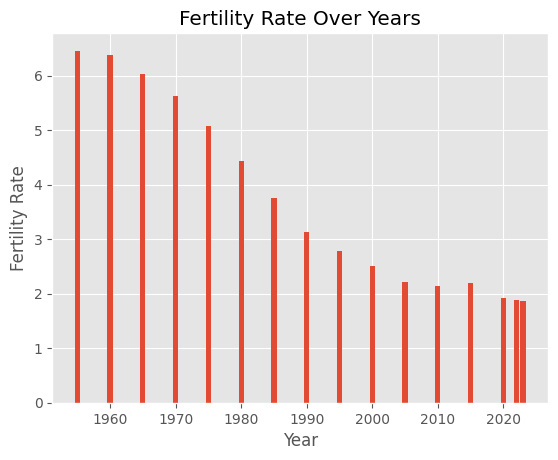

In [23]:
plt.bar(df["Year"], df["Fertility Rate"])
plt.xlabel("Year")
plt.ylabel("Fertility Rate")
plt.title("Fertility Rate Over Years")
plt.show()

Text(0.5, 0, 'Median Age')

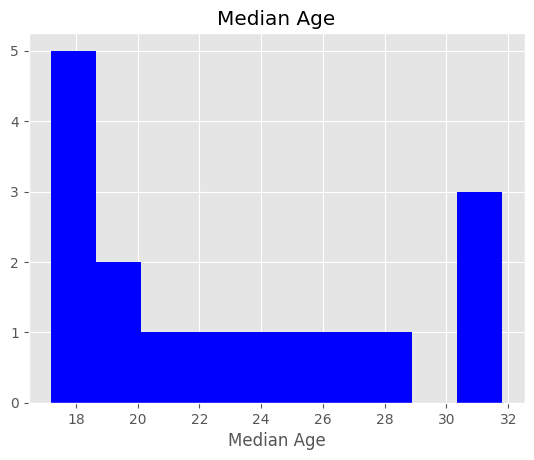

In [24]:
plt.hist(df["Median Age"], bins=10, color="blue")
plt.title("Median Age")
plt.xlabel("Median Age")

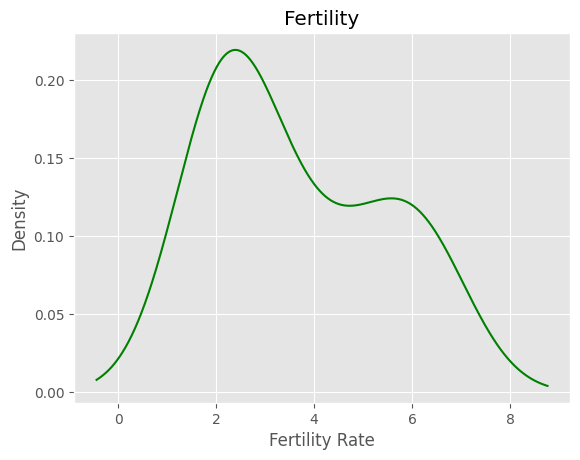

In [25]:
sdf = df["Fertility Rate"].plot(kind="kde", title="Fertility", color="green")
sdf.set_xlabel("Fertility Rate")
plt.show()

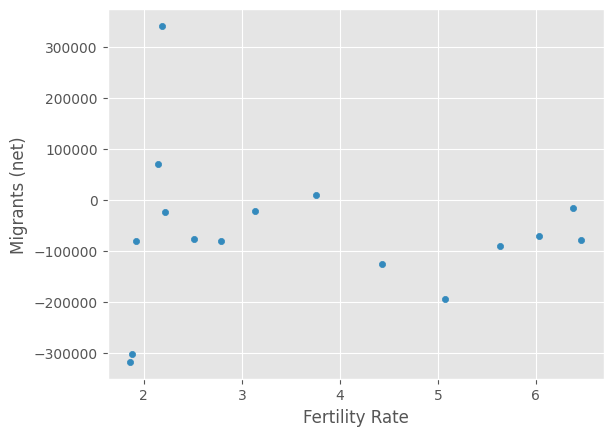

In [26]:
sdf = df.plot(kind="scatter", x="Fertility Rate", y="Migrants (net)")
plt.show()

In [27]:
dfcorr = df[["Population", "Yearly Change", "Migrants (net)", "Fertility Rate", "Density (P/Km²)", "Urban Population", "World Population"]]\
.dropna().corr()

<Axes: >

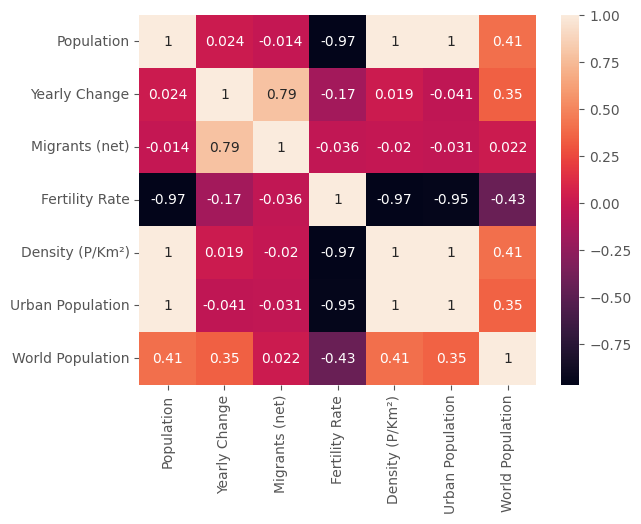

In [28]:
sns.heatmap(dfcorr, annot=True)